In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import sys
from haversine import haversine

In [2]:
# read in labels
labels = pd.read_csv('data/processed-labels/labels_full_features_chicago.csv')

In [5]:
labels


,audit_task_id,label_id,gsv_panorama_id_x,label_type,severity,correct,high_quality_user,geometry,gsv_panorama_id_y,zoom,heading,pitch,photographer_heading,photographer_pitch,user_id,lat,lng,cluster_id,count,distance,tag_list,description,tag_count,way_type,intersection_distance
0,3,8,pMph48Z6Xz2hexFJ7q3d_Q,CurbRamp,2.0,NaN,True,POINT (-87.9803466796875 42.08366775512695),pMph48Z6Xz2hexFJ7q3d_Q,2,136.687500,-18.625000,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,42.083668,-87.980347,4248,1,26.937984,1.0,0.0,1.0,service,44.351012
1,3,9,pMph48Z6Xz2hexFJ7q3d_Q,CurbRamp,1.0,True,True,POINT (-87.98060607910156 42.08369445800781),pMph48Z6Xz2hexFJ7q3d_Q,2,249.937500,-14.125000,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,42.083694,-87.980606,2476,2,0.095994,0.0,0.0,0.0,service,17.967994
2,3,10,pMph48Z6Xz2hexFJ7q3d_Q,CurbRamp,2.0,False,True,POINT (-87.98060607910156 42.08378601074219),pMph48Z6Xz2hexFJ7q3d_Q,3,288.656250,-13.187500,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,42.083786,-87.980606,4315,1,12.865493,1.0,0.0,1.0,footway,12.865493
3,3,11,pMph48Z6Xz2hexFJ7q3d_Q,CurbRamp,3.0,True,True,POINT (-87.98035430908203 42.08379364013672),pMph48Z6Xz2hexFJ7q3d_Q,3,49.245537,-16.220982,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,42.083794,-87.980354,2414,2,19.137887,1.0,0.0,2.0,service,37.606204
4,3,12,pMph48Z6Xz2hexFJ7q3d_Q,CurbRamp,3.0,True,True,POINT (-87.98036193847656 42.08381652832031),pMph48Z6Xz2hexFJ7q3d_Q,3,42.636162,-16.033482,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,42.083817,-87.980362,4730,1,27.486550,1.0,0.0,2.0,service,40.797927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,4588,21507,hhAF_qDTHgN0dL8SNsr-oA,SurfaceProblem,3.0,True,True,POINT (-87.66429138183594 41.61117935180664),hhAF_qDTHgN0dL8SNsr-oA,1,126.341515,-32.937500,179.073898,0.395355,71959a82-3f47-4dec-a02b-86669bf8095b,41.611179,-87.664291,28,10,34.547879,1.0,0.0,1.0,-1,-1.000000
18281,4588,21508,hhAF_qDTHgN0dL8SNsr-oA,SurfaceProblem,2.0,NaN,True,POINT (-87.66455078125 41.61113739013672),hhAF_qDTHgN0dL8SNsr-oA,1,213.154022,-35.000000,179.073898,0.395355,71959a82-3f47-4dec-a02b-86669bf8095b,41.611137,-87.664551,7,9,36.756497,1.0,0.0,1.0,-1,-1.000000
18282,4589,21509,tZWhmOw4CIP9bQLJycSyqQ,CurbRamp,1.0,NaN,True,POINT (-87.6463394165039 41.60987091064453),tZWhmOw4CIP9bQLJycSyqQ,3,217.380630,-16.302500,179.386520,-0.660645,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,41.609871,-87.646339,29,11,24.974161,0.0,0.0,0.0,residential,45.805749
18283,4601,21517,nWTcoxo4S0MImzzvlQGwpQ,CurbRamp,1.0,True,True,POINT (-87.65129089355469 41.62562561035156),nWTcoxo4S0MImzzvlQGwpQ,3,248.244995,-13.510625,359.491150,-0.079690,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,41.625626,-87.651291,18,10,13.716964,0.0,0.0,0.0,residential,39.930634


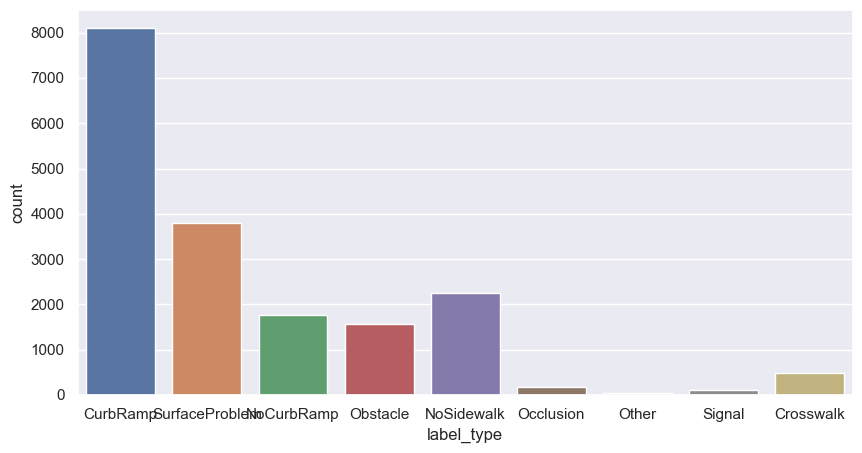

In [17]:
#plot by type
sns.countplot(x='label_type', data=labels)
#make plot bigger
plt.rcParams['figure.figsize'] = [24, 5]


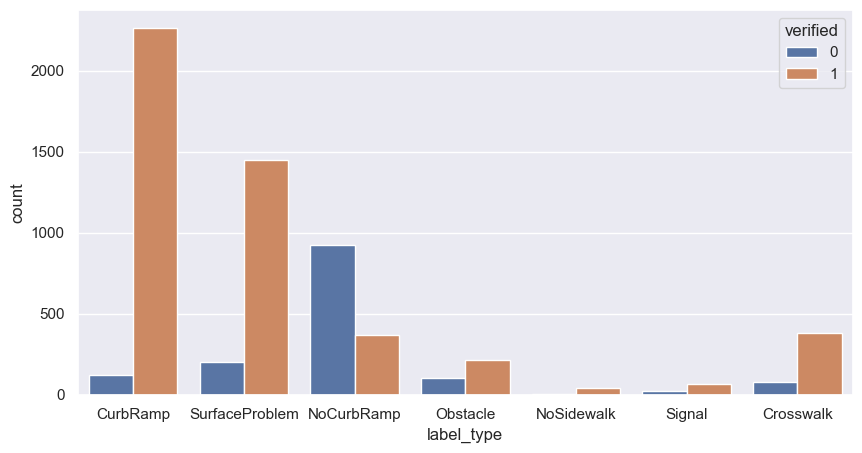

In [16]:
#plot by type
sns.countplot(x='label_type', data=test, hue='verified')
#make plot bigger
plt.rcParams['figure.figsize'] = [10, 5]

In [9]:
# read in data
test = pd.read_csv('data/processed-labels/test_set_chicago.csv')
test

,audit_task_id,label_id,gsv_panorama_id_x,label_type,severity,correct,high_quality_user,geometry,gsv_panorama_id_y,zoom,heading,pitch,photographer_heading,photographer_pitch,user_id,lat,lng,cluster_id,count,distance,tag_list,description,tag_count,way_type,intersection_distance,verified
0,3,8,pMph48Z6Xz2hexFJ7q3d_Q,CurbRamp,2.0,NaN,True,POINT (-87.9803466796875 42.08366775512695),pMph48Z6Xz2hexFJ7q3d_Q,2,136.687500,-18.625000,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,42.083668,-87.980347,4248,1,26.937984,1.0,0.0,1.0,service,44.351012,1
1,3,9,pMph48Z6Xz2hexFJ7q3d_Q,CurbRamp,1.0,True,True,POINT (-87.98060607910156 42.08369445800781),pMph48Z6Xz2hexFJ7q3d_Q,2,249.937500,-14.125000,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,42.083694,-87.980606,2476,2,0.095994,0.0,0.0,0.0,service,17.967994,1
2,3,11,pMph48Z6Xz2hexFJ7q3d_Q,CurbRamp,3.0,True,True,POINT (-87.98035430908203 42.08379364013672),pMph48Z6Xz2hexFJ7q3d_Q,3,49.245537,-16.220982,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,42.083794,-87.980354,2414,2,19.137887,1.0,0.0,2.0,service,37.606204,1
3,3,14,Ho0laSMnEYrjIhh2Xk0xVg,SurfaceProblem,1.0,True,True,POINT (-87.98036193847656 42.08383560180664),Ho0laSMnEYrjIhh2Xk0xVg,2,352.198669,-14.926339,269.854431,0.359947,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,42.083836,-87.980362,1515,4,30.094387,1.0,0.0,1.0,-1,-1.000000,1
4,5,18,VvFlgEkOuGmMtvvgO6lZog,CurbRamp,1.0,True,True,POINT (-87.97919464111328 42.08381652832031),VvFlgEkOuGmMtvvgO6lZog,2,40.319195,-12.854911,270.559692,1.520401,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,42.083817,-87.979195,5131,3,17.611723,0.0,0.0,0.0,residential,37.213173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6251,4588,21502,xKEHCYuha-gJIlbS69pQSQ,SurfaceProblem,2.0,True,True,POINT (-87.66431427001953 41.611446380615234),xKEHCYuha-gJIlbS69pQSQ,1,128.779022,-34.812500,179.218628,-0.064674,71959a82-3f47-4dec-a02b-86669bf8095b,41.611446,-87.664314,78,10,27.812788,1.0,0.0,2.0,-1,-1.000000,1
6252,4588,21505,azH3XAm4QKnRlWXtJaiwxA,Obstacle,3.0,True,True,POINT (-87.66429901123047 41.61117935180664),azH3XAm4QKnRlWXtJaiwxA,1,156.529022,-31.625000,179.852203,0.201590,71959a82-3f47-4dec-a02b-86669bf8095b,41.611179,-87.664299,11,10,32.448671,1.0,0.0,1.0,-1,-1.000000,1
6253,4588,21506,azH3XAm4QKnRlWXtJaiwxA,SurfaceProblem,2.0,True,True,POINT (-87.66453552246094 41.611183166503906),azH3XAm4QKnRlWXtJaiwxA,1,225.716522,-35.000000,179.852203,0.201590,71959a82-3f47-4dec-a02b-86669bf8095b,41.611183,-87.664536,38,10,32.633024,1.0,0.0,1.0,-1,-1.000000,1
6254,4588,21507,hhAF_qDTHgN0dL8SNsr-oA,SurfaceProblem,3.0,True,True,POINT (-87.66429138183594 41.61117935180664),hhAF_qDTHgN0dL8SNsr-oA,1,126.341515,-32.937500,179.073898,0.395355,71959a82-3f47-4dec-a02b-86669bf8095b,41.611179,-87.664291,28,10,34.547879,1.0,0.0,1.0,-1,-1.000000,1
